In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [46]:
PATH = "girls_msk_data.csv"
dataset = pd.read_csv(PATH)

In [47]:
dataset.head()

,age,name,breasts_size,weight,height,sex_tags,district_of_work,price_per_hour,price_per_2h,price_per_night
0,21,Дарья,3,55,180,"['Индивидуалка', 'МБР', 'Эскорт', 'Целуюсь', '...","['Москва', 'Хорошёвский']",15000.0,30000.0,75000.0
1,19,Эмма,2,63,168,"['Диспетчер', 'МБР', 'Эскорт', 'Целуюсь', 'Апа...","['Москва', 'Отрадное']",11000.0,22000.0,65000.0
2,23,Ника,3,75,185,"['Индивидуалка', 'МБР', 'Целуюсь', 'GFE', 'Выс...","['Москва', 'Тёплый Стан']",8000.0,16000.0,45000.0
3,18,Милана,1,45,163,"['Индивидуалка', 'МБР', 'Целуюсь', 'Апартамент...","['Москва', 'Савёловский']",10000.0,20000.0,60000.0
4,21,Alina vanilla,3,52,170,"['Индивидуалка', 'Анальный секс', 'МБР', 'Эско...","['Москва', 'Пресненский']",20000.0,40000.0,120000.0


In [48]:
dataset = dataset[["age", "breasts_size", "weight", "height", "price_per_hour"]]

In [49]:
dataset.head()

,age,breasts_size,weight,height,price_per_hour
0,21,3,55,180,15000.0
1,19,2,63,168,11000.0
2,23,3,75,185,8000.0
3,18,1,45,163,10000.0
4,21,3,52,170,20000.0


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1262 non-null   int64  
 1   breasts_size    1262 non-null   int64  
 2   weight          1262 non-null   int64  
 3   height          1262 non-null   int64  
 4   price_per_hour  1262 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 49.4 KB


In [51]:
dataset = dataset[dataset['breasts_size'] <= 4]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1206 entries, 0 to 1261
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1206 non-null   int64  
 1   breasts_size    1206 non-null   int64  
 2   weight          1206 non-null   int64  
 3   height          1206 non-null   int64  
 4   price_per_hour  1206 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 56.5 KB


Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

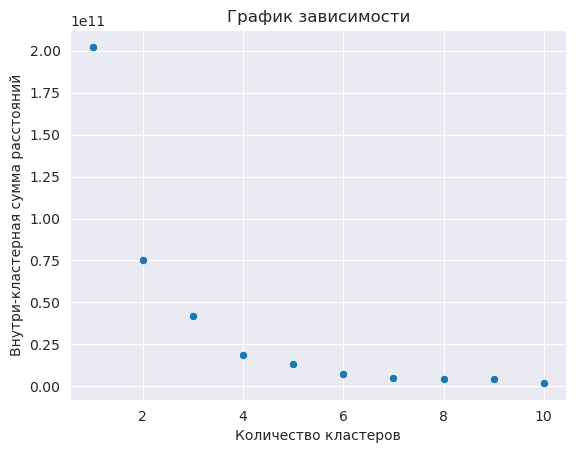

In [54]:
inertia = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init= 'k-means++')
    k_means.fit(dataset.drop("breasts_size", axis=1))
    inertia.append(k_means.inertia_)

sns.set_style('darkgrid')

sns.scatterplot(
    x=[x for x in range(1, 11)],
    y=inertia,
)

plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')

In [122]:
CLUSTERS = 4

model = KMeans(n_clusters=CLUSTERS, random_state=0)
model.fit(dataset.drop("breasts_size", axis=1))

clusters = pd.DataFrame(
    columns=dataset.columns.drop("breasts_size"),
    data=model.cluster_centers_
)
clusters["Amount"] = np.unique(
    model.labels_,
    return_counts=True
)[1]

clusters

,age,weight,height,price_per_hour,Amount
0,24.292011,53.239669,167.688705,24181.818182,363
1,24.548961,54.213650,167.043027,12260.385757,674
2,23.743243,52.945946,169.371622,41554.054054,148
3,20.857143,49.428571,168.285714,77142.857143,21
